# **Predicting Churn for a Telco Company**

For this project, we are going to predict churn for a telecommunication company. We want to develop a methodology that will identify the most important factors of customer churn and thus allow us to predict which customers are at risk to cancel service.

### *About the Data*

The data we will use for this project comes from Predicting Telco Churn found on kaggle. The link to the data can be found here:
    https://www.kaggle.com/blastchar/telco-customer-churn

In [1]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Using seaborn for visualization
plt.rcParams['figure.figsize'] = [18, 6]

## Import Data

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', na_values = ' ')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Clean-up

Check for null values

In [4]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 null values in total charges. Those are for new customers who have not received their bill yet. We will impute 0 for those NAs.

In [5]:
df['TotalCharges'].fillna(0, inplace=True)

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Total Charges should be a numeric.

In [7]:
#Change total charges to numeric
df['TotalCharges'] = df['TotalCharges'].apply(pd.to_numeric)

In [8]:
#Change No internet service adn No phone service to No for all columns
df = df.replace('No internet service','No')
df = df.replace('No phone service','No')

## Data Exploration

We want to explore churn across the many different customer segments. 

### Customers and Demographics

#### Description of Data

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


#### Number of customers

In [10]:
# Number of customers
customerCount = df['customerID'].nunique()
print('Total number of customers: {:d}'.format(customerCount))

Total number of customers: 7043


#### Number of customers that have churned

In [11]:
churnCount = df[(df['Churn'] == 'Yes')]['customerID'].count()
print('Total number of customers churned:', churnCount)

Total number of customers churned: 1869


#### Percentage of customers that have churned

In [12]:
churnPercentage = churnCount/customerCount
print('Percentage of customers churned:', format(churnPercentage, '.3f'))

Percentage of customers churned: 0.265


#### Count of Customers 

Next, we are going to get a count of customers by each of the customer attributes.

In [13]:
customerAttributes = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',  'PhoneService', 'MultipleLines',
                         'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                         'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']] 

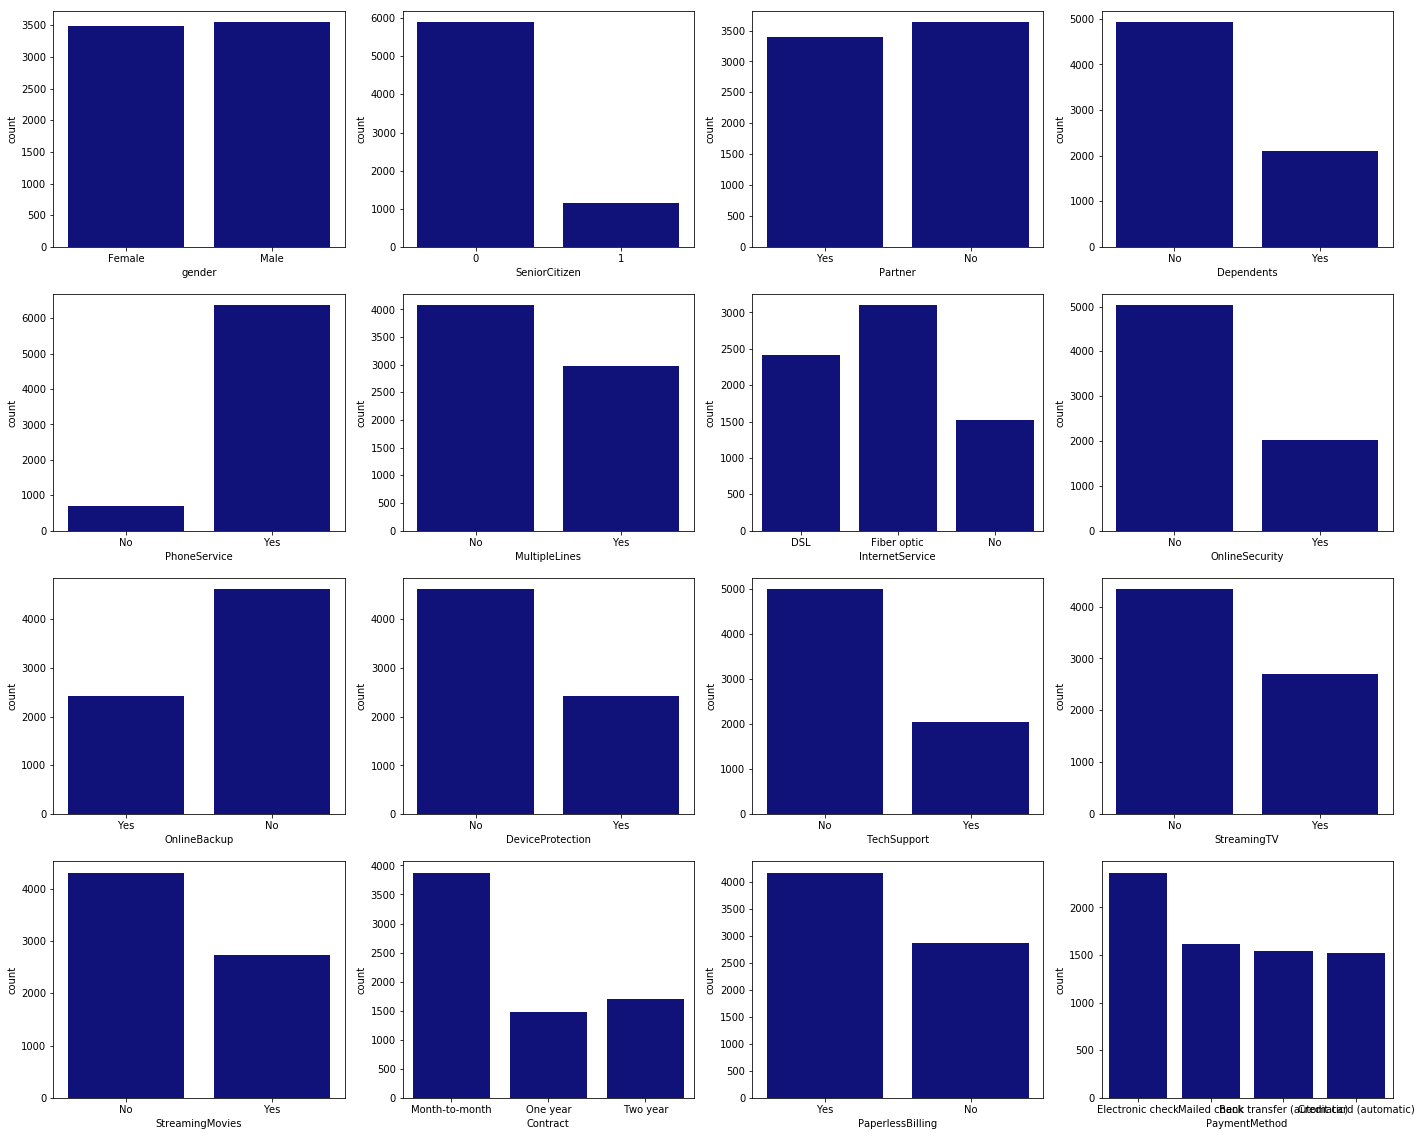

In [14]:
f, axes = plt.subplots(4,4, figsize=(24, 20), sharex=False)

for i, col in enumerate(customerAttributes.columns):
    sns.countplot(customerAttributes[col], color='darkblue',ax=axes[i//4, i%4]) 
plt.show()

If we look at our charts above, some of the observations we see are:
- Gender appears to be evenly distributed
- Overwhelming number of customers are not senior citizens
- Most customers do have phone service
- For customers with internet service Fiber optic is the most common type
- Electronic check is the most common method of payment

#### Churners vs. Non-Churners - Categorical

Next, we are going to compare churners vs. non-churners categorical customer attributes.

In [15]:
customerAttributes = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',  'PhoneService', 'MultipleLines',
                         'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                         'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']] 

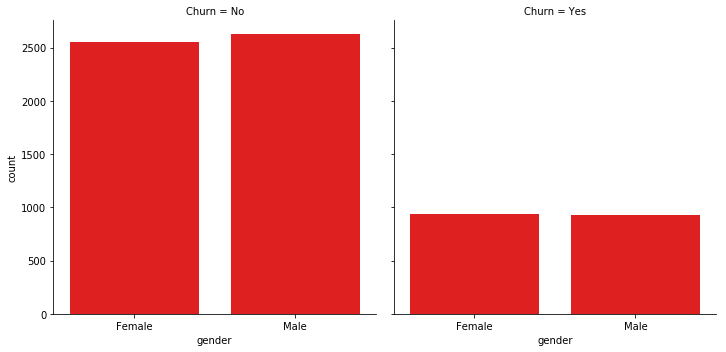

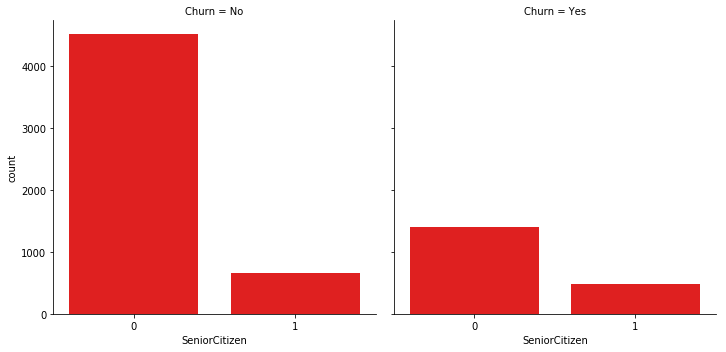

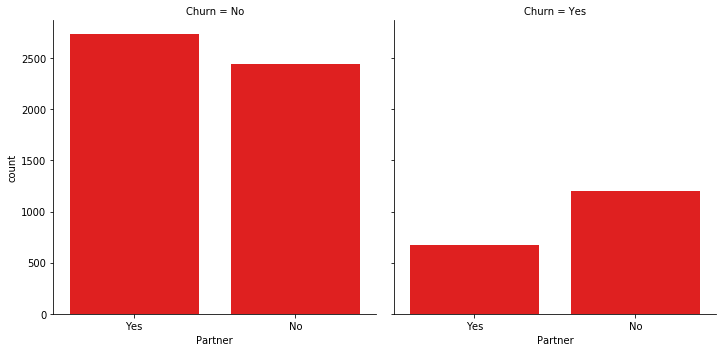

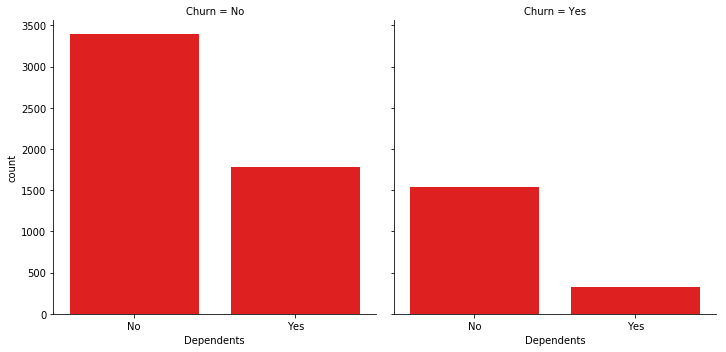

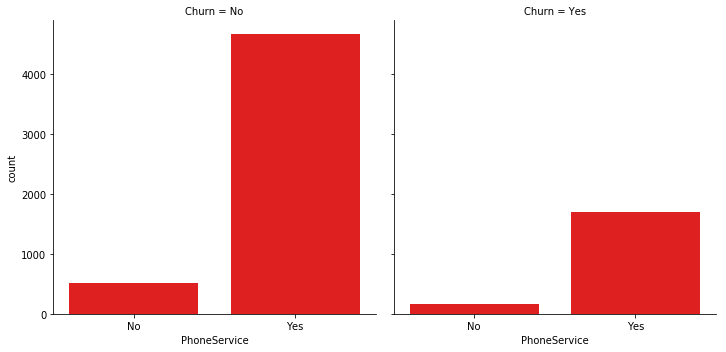

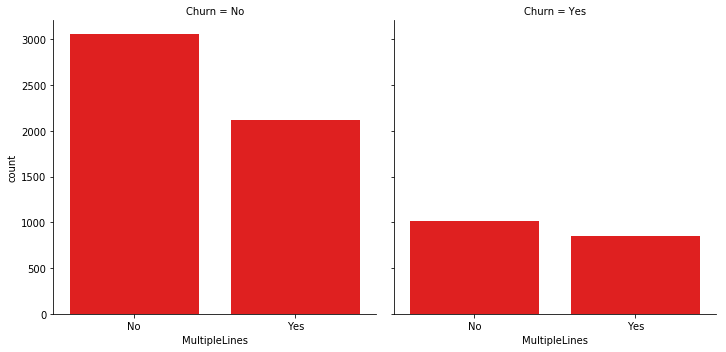

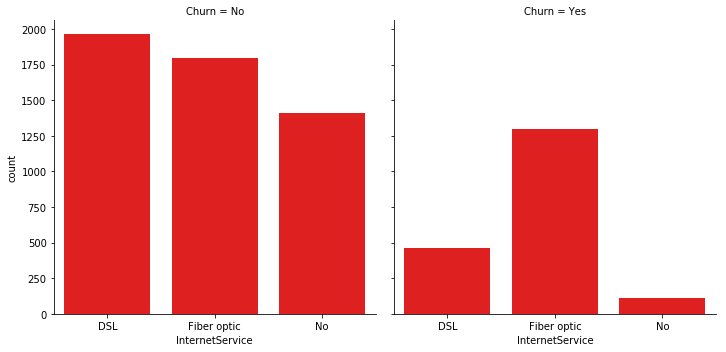

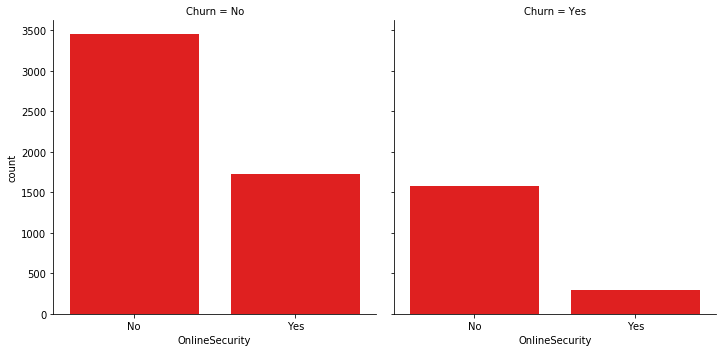

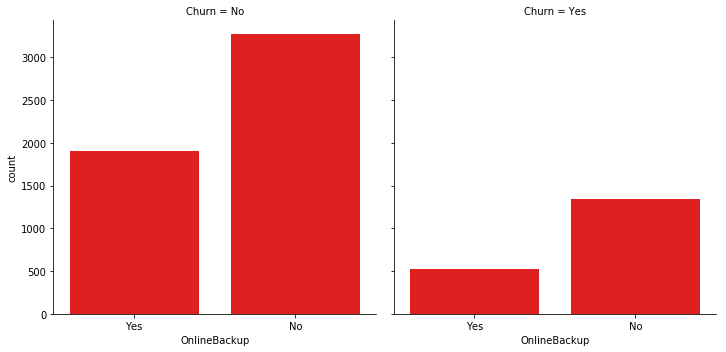

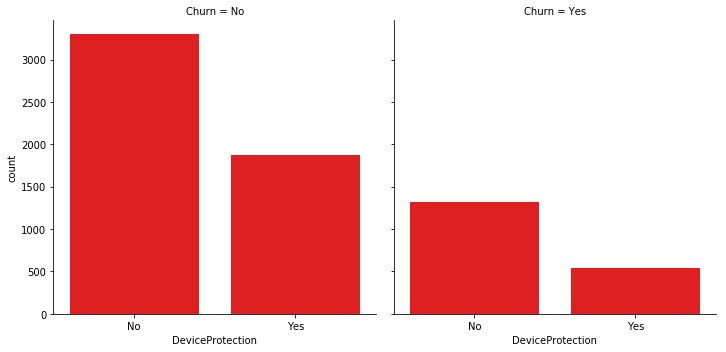

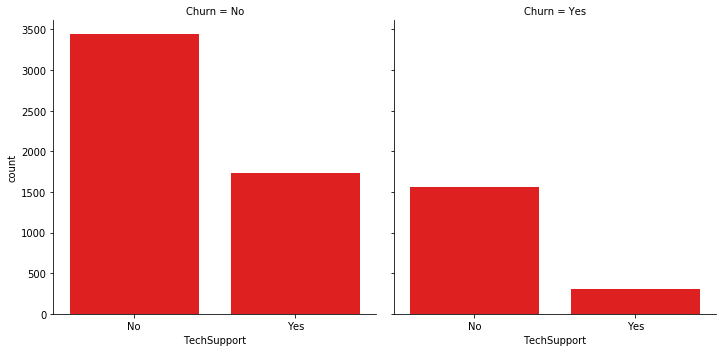

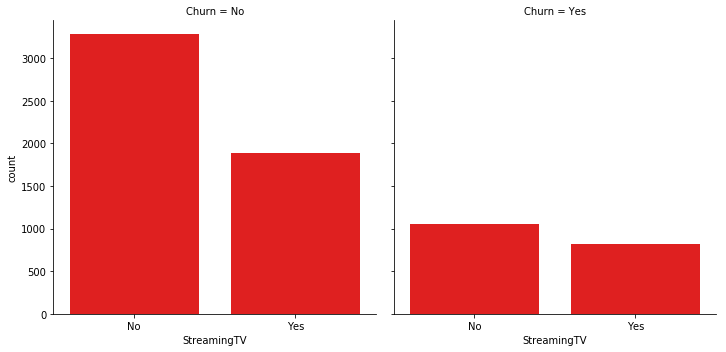

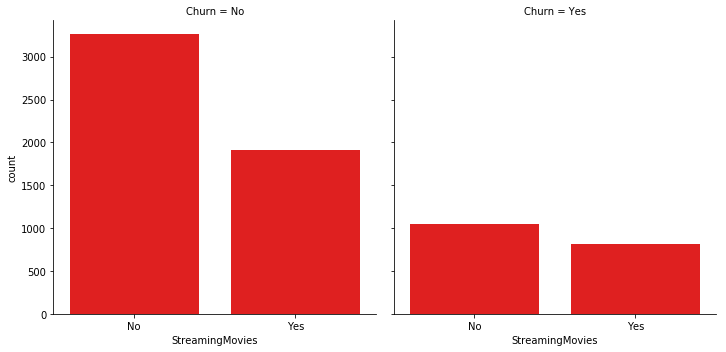

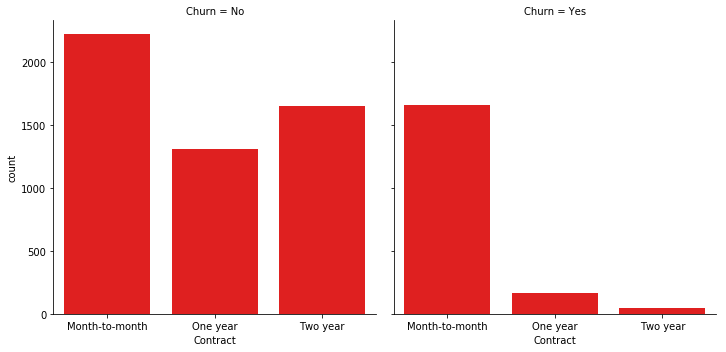

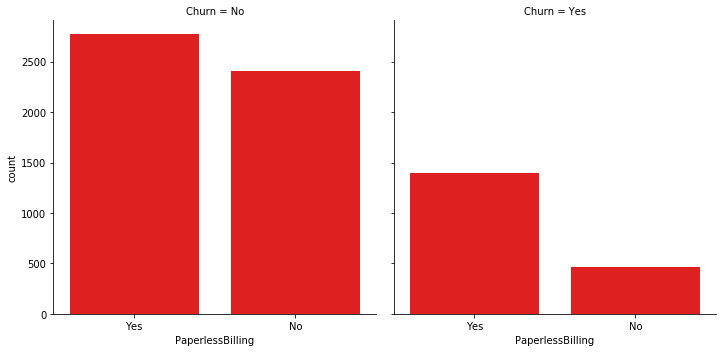

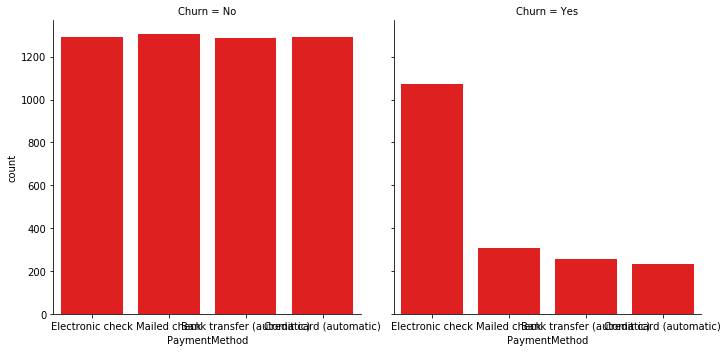

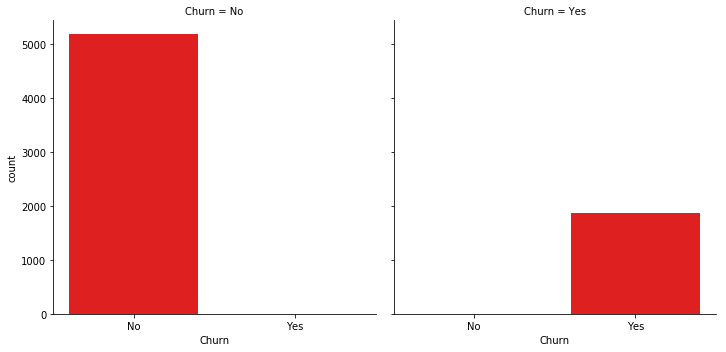

In [16]:
for i, col in enumerate(customerAttributes.columns):
    sns.catplot(data=customerAttributes,x=col, col='Churn', color='red',kind='count') 
plt.show()

From the charts above:
- Higher portion of churners are senior citizens vs. non-churners
- Higher proportion of churners have fiber optic for internet service vs, non-churners
- Churners tend to more likely by on momth-to-month contracts vs. non-churners
- Churners are more likely to pay via electronic check compared to non-churners

#### Churners vs. Non-Churners - Numerical

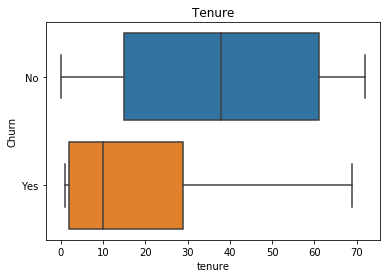

In [17]:
customerAttributes = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']] 
sns.boxplot(x=customerAttributes['tenure'], y=customerAttributes['Churn'],  showfliers=False) 
plt.title('Tenure')
plt.show()

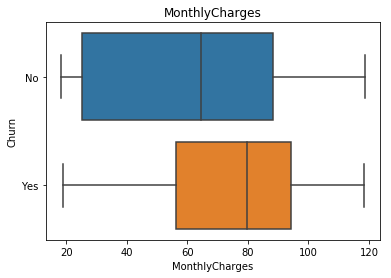

In [18]:
sns.boxplot(x=customerAttributes['MonthlyCharges'], y=customerAttributes['Churn'],  showfliers=False) 
plt.title('MonthlyCharges')
plt.show()

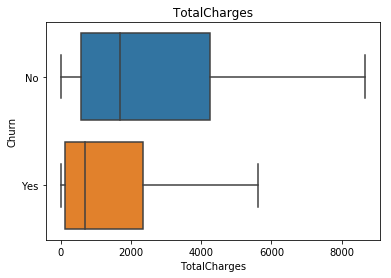

In [19]:
sns.boxplot(x=customerAttributes['TotalCharges'], y=customerAttributes['Churn'],  showfliers=False) 
plt.title('TotalCharges')
plt.show()

Comparing churners vs. non-churnes for the numeric features:
- Churners have a shorter tenure (not surprising)
- Churners tend to have higher monthly chargers
- TotalCharges for chuners is lower since they tend to have shorter tenure

## Model Building

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
import statsmodels.api as sm

For our first model, we are going to build utilizing logistic regression to predict churn. First, let's have a look at our data.

Here are some of the common assumptions about logistic regression:
- Binary logistic regression requires the dependent variable to be binary
- Observations are independent of each other
- Little or no multicollinearity among the independent variables
- Assumes linearity of independent variables and log odds

In [21]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


A couple of observations: 
- Partner, Dependents, MultipleLines, Phone Service, Online Security, Online Backup, Device Protection, Tech Support, StreamingTV, StreamingMovies, PaperlessBilling, and Churn all need to be recoded as binary.
- Gender, InternetService, Contract, and PaymentMethod need to be one-hot encoded.

### Binary Encoding

In [22]:
#Get columns that we will change to categorical
cat_columns = ['Partner', 'MultipleLines', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

#Convert columns to category
df[cat_columns] = df[cat_columns].astype('category')

#Convert t0 binary values
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

### One-Hot Encoding (Leave one out)

For our category columns that are not binary, we need to one-hot encode them to use them in our logistic regression model. Also, we will leave one variable out as a reference value for interpreting our logistic regression output.

In [23]:
#Get columns that we will one-hot encode
cat_columns = ['gender', 'InternetService', 'Contract', 'PaymentMethod']

#One-hot encode columns from above
model = pd.get_dummies(df, prefix_sep="_", columns=cat_columns, drop_first=True)

#Drop customerID columns
model = model.drop(['customerID'], axis=1)

So our refernce columns for our models are as follows:
- gender=Female
- InternetService=DSL
- Contract=Month-to-month
- PaymentMethod=Bank transfer (automatic)

Next, let's look at redundant variables.

### Correlation amongst independent variables

In [24]:
#Let's build a correlation plot to see which variables we can remove
#Compute the correlation matrix
import matplotlib as mpl
def correlationPlot(features):
    mpl.rcParams["font.size"] = 7
    
    corr = features.corr()

    #Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    #Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f", square=True)
    plt.title('Correlation - Model Variables')
    plt.show()

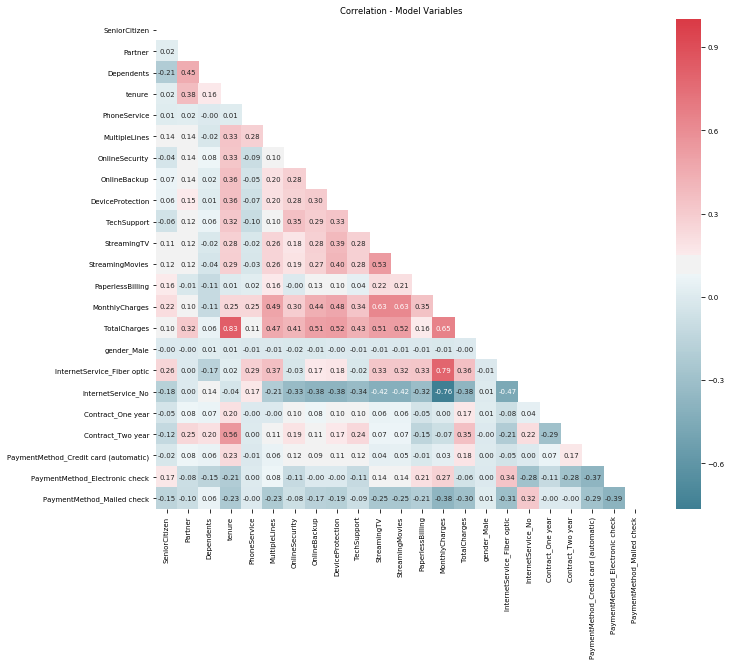

In [25]:
#Run correlation plot function off of features
features = model.drop(['Churn'], axis=1)
correlationPlot(features)

Looking at this correlation plot, some variables are highly correlated with other variables. We will remove the following variables:
- TotalCharges (highly correlated with tenure)
- Monthly Charges (highly correlted withInternetService_No and InternetService_Fiber optic)

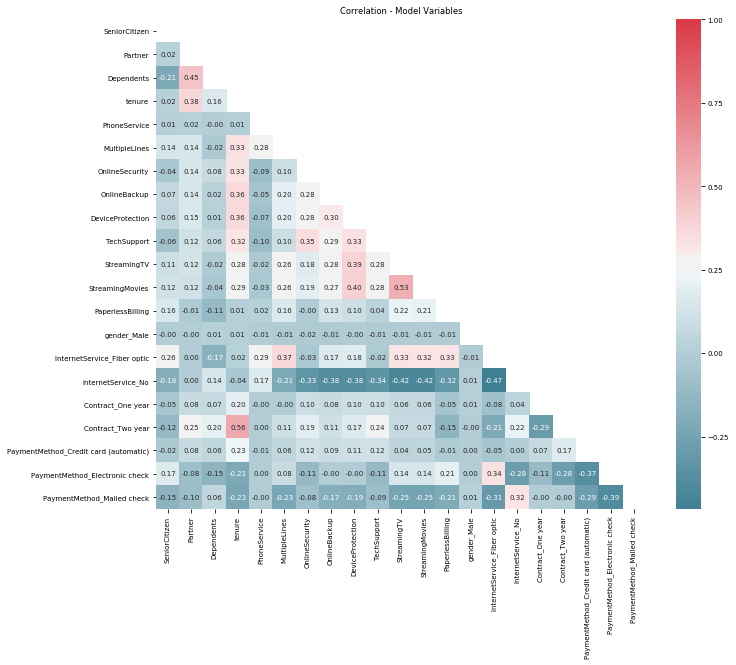

In [26]:
features = model.drop(['Churn', 'TotalCharges', 'MonthlyCharges'], axis=1)
correlationPlot(features)

Next, we wil go ahead and build our model

### Test/Training Data Split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
#Create our predictor and independent variables based of analysis above
y=model[['Churn']]
X=model.drop(['Churn', 'TotalCharges', 'MonthlyCharges'], axis=1)
X = sm.add_constant(X)

C:\Users\cartn\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [29]:
#Create Training/Test split of 66/33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
print (X_train.shape, y_train.shape)

(4930, 22) (4930, 1)


In [31]:
print (X_test.shape, y_test.shape)

(2113, 22) (2113, 1)


### Model 1

In [32]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.419274
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                          Logit   Df Residuals:                     4908
Method:                           MLE   Df Model:                           21
Date:                Mon, 27 Jan 2020   Pseudo R-squ.:                  0.2719
Time:                        10:12:48   Log-Likelihood:                -2067.0
converged:                       True   LL-Null:                       -2838.9
                                        LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.1953      

In [33]:
#Get odds for each parameter
np.exp(result.params)

const                                    0.822584
SeniorCitizen                            1.231124
Partner                                  1.011054
Dependents                               0.881198
tenure                                   0.968270
PhoneService                             0.636501
MultipleLines                            1.320635
OnlineSecurity                           0.659607
OnlineBackup                             0.856105
DeviceProtection                         1.037576
TechSupport                              0.764368
StreamingTV                              1.139798
StreamingMovies                          1.429322
PaperlessBilling                         1.355372
gender_Male                              0.926224
InternetService_Fiber optic              2.338909
InternetService_No                       0.438726
Contract_One year                        0.536598
Contract_Two year                        0.221214
PaymentMethod_Credit card (automatic)    0.930914


In [34]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\cartn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\cartn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
#Predict test results from trained logit model
y1_pred=logreg.predict(X_test)
y1_pred_train=logreg.predict(X_train)

#### Results - Model 1

##### Accuracy 

In [36]:
def trainTestLogitModelAccuracy(X_train, y_train, X_test, y_test, y_pred_train, y_pred):
    # Print Train results
    print("Train set: Number of mislabeled points out of a total {} points : {}, Accuracy {:05.2f}%"
          .format(
              X_train.shape[0],
              (y_train != y_pred_train).sum(),
              100*(1-(y_train != y_pred_train).sum()/X_train.shape[0])
    )) 

    # Print Test results
    print("Test set: Number of mislabeled points out of a total {} points : {}, Accuracy {:05.2f}%"
          .format(
              X_test.shape[0],
              (y_test != y_pred).sum(),
              100*(1-(y_test != y_pred).sum()/X_test.shape[0])
    ))   

In [37]:
trainTestLogitModelAccuracy(X_train, y_train['Churn'], X_test, y_test['Churn'], y1_pred_train, y1_pred)

Train set: Number of mislabeled points out of a total 4930 points : 975, Accuracy 80.22%
Test set: Number of mislabeled points out of a total 2113 points : 397, Accuracy 81.21%


##### Confusion Matrix 

In [38]:
def confusionMatrix(y_test, y_pred):
    #Build Confusion Matrix
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    cnf_matrix
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion Matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

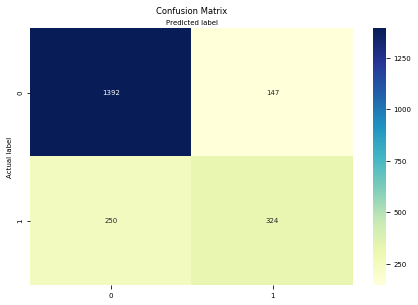

In [39]:
confusionMatrix(y_test, y1_pred)

In [40]:
print(classification_report(y_test, y1_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1539
           1       0.69      0.56      0.62       574

   micro avg       0.81      0.81      0.81      2113
   macro avg       0.77      0.73      0.75      2113
weighted avg       0.80      0.81      0.81      2113



##### ROC Curve

An ROC curve helps tell us how good our binary classifier is. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)

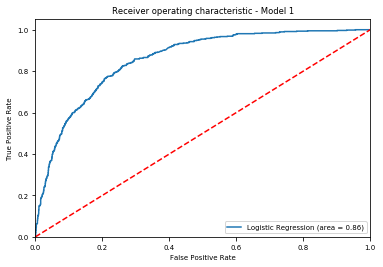

In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test['Churn'].to_numpy(), logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test['Churn'].to_numpy(), logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Model 1')
plt.legend(loc="lower right")
plt.show()

### Model 2

For our next model, we are going to remove those variables that are not significant.

In [42]:
y=model[['Churn']]
X=model.drop(['Churn', 'TotalCharges', 'MonthlyCharges', 'Partner', 'Dependents', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'gender_Male', 
        'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check'], axis=1)
X = sm.add_constant(X)

C:\Users\cartn\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [43]:
colnames = (X.columns.values)

In [44]:
X_train= X_train[colnames]
X_test = X_test[colnames]

In [45]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.420094
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                          Logit   Df Residuals:                     4916
Method:                           MLE   Df Model:                           13
Date:                Mon, 27 Jan 2020   Pseudo R-squ.:                  0.2705
Time:                        10:12:49   Log-Likelihood:                -2071.1
converged:                       True   LL-Null:                       -2838.9
                                        LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.2991      0.149     -2.011     

In [46]:
#Get odds for each parameter
np.exp(result.params).sort_values(ascending=False)

InternetService_Fiber optic       2.396421
StreamingMovies                   1.500515
PaymentMethod_Electronic check    1.443224
PaperlessBilling                  1.365695
MultipleLines                     1.318870
SeniorCitizen                     1.256202
tenure                            0.967410
TechSupport                       0.775052
const                             0.741448
OnlineSecurity                    0.654506
PhoneService                      0.637070
Contract_One year                 0.540139
InternetService_No                0.446271
Contract_Two year                 0.221363
dtype: float64

Based on the odds ratios: 
- If a customer opts for Fiber optic intenet service, their likelihood of churning increases by 2.4x over customers with DSL 
- If a customer opts for StreamingMovies, their likelihood of churning increases by 1.5x over customers that do not stream movies
- If a customer opts for a two year contract, their likelihood  of churning descreases by about 78% vs. someone on a month-to-month contract

All odds ratios are based on all variables holding constant.

In [47]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\cartn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\cartn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
#Predict test results from trained model 2
y2_pred=logreg.predict(X_test)
y2_pred_train=logreg.predict(X_train)

#### Results - Model 2

##### Accuracy 

In [49]:
trainTestLogitModelAccuracy(X_train, y_train['Churn'], X_test, y_test['Churn'], y2_pred_train, y2_pred)

Train set: Number of mislabeled points out of a total 4930 points : 972, Accuracy 80.28%
Test set: Number of mislabeled points out of a total 2113 points : 397, Accuracy 81.21%


##### Confusion Matrix 

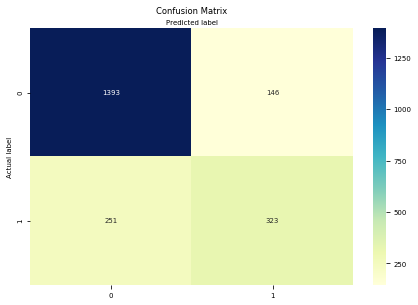

In [50]:
confusionMatrix(y_test, y2_pred)

In [51]:
print(classification_report(y_test, y2_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1539
           1       0.69      0.56      0.62       574

   micro avg       0.81      0.81      0.81      2113
   macro avg       0.77      0.73      0.75      2113
weighted avg       0.80      0.81      0.81      2113



##### ROC Curve

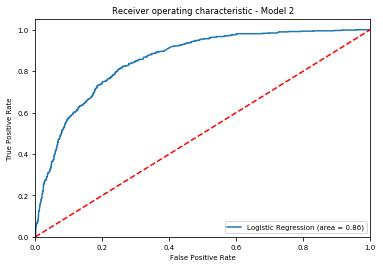

In [52]:
logit_roc_auc = roc_auc_score(y_test['Churn'].to_numpy(), logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test['Churn'].to_numpy(), logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Model 2')
plt.legend(loc="lower right")
plt.show()

## Conclusion

So after building the regression model, our second model was best at predicting whether a customer churned at 81.2% accuracy. Based on the odds ratios (holding all other variables constant):
- If a customer opts for Fiber optic intenet service, their likelihood of churning increases by 2.4x over customers with DSL 
- If a customer opts for StreamingMovies, their likelihood of churning increases by 1.5x over customers that do not stream movies
- If a customer opts for a two year contract, their likelihood  of churning decreases by about 78% vs. someone on a month-to-month contract

If I was to continue this project even further, I would potentially explore other classification techniques (i.e. Decision Trees) for prediction and segment out the user base (via a clustering strategy like K-means) for potential marketing strategies.